In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


In [2]:
X_train_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/X_train_1.npy')/255
X_test_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/X_test_1.npy')/255
Y_train_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/Y_train_1.npy')
Y_test_1=np.load(file='C:/Users/haile/OneDrive - University of Bristol/assessment3/DST-assessment-3.1/DST-assessment-3/Zhihui zhang/Y_test_1.npy')


In [3]:
#set some default parameter
BS = 32 #batch size
default_image_size = tuple((224,224))
image_size = 0
width=224
height=224
depth=3
n_classes=15

In [4]:
#define the metrics for training data
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

def display_training_curves(training, validation, yaxis):
    ylabel = "{}".format(yaxis)
    title = "{} vs. Epochs".format(yaxis)
    
    epochs = np.arange(1, len(training) + 1)
    
    plt.figure()
    plt.plot(epochs, training, 'bo-', label='Train')
    plt.plot(epochs, validation, 'ro-', label='Val')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    
    filename = 'final_cnn_{}.png'.format(yaxis)
    plt.savefig(filename)
    print('Figure saved as {}'.format(os.path.abspath(filename)))
    
    plt.show()


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               vertical_flip=True)

model = tf.keras.backend.clear_session()
model = None
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
# 创建模型
model = Sequential()

# 第一层卷积层
model.add(Conv2D(filters=64, kernel_size=[3, 3], strides=1, padding="same", activation="relu", input_shape=inputShape))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"))

# 第二层卷积层
model.add(Conv2D(filters=128, kernel_size=[3, 3], strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"))

# 第三层卷积层
model.add(Conv2D(filters=256, kernel_size=[3, 3], strides=1, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=[2, 2], strides=2, padding="same"))

# 将卷积后的输出拉平为一维向量
model.add(Flatten())

# 全连接层
model.add(Dense(units=1024, activation="relu"))

# 分类层
model.add(Dense(units=n_classes, activation="softmax"))


In [8]:
def model1():
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 模型2：前10000个batch使用0.01的学习率，10000个batch之后学习率降到0.001
def model2():
    def lr_schedule(epoch=30):
        if epoch < 10:
            return 0.01
        else:
            return 0.001

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 模型3：前10000个batch使用0.01的学习率，10000~20000个batch使用0.001的学习率，20000个batch之后学习率降到0.0005
def model3():
    def lr_schedule(epoch=30):
        if epoch < 10:
            return 0.01
        elif epoch < 20:
            return 0.001
        else:
            return 0.0005
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', f1_m,  precision_m, recall_m])
    return model


In [10]:
model_3 = model3()
history_3 = model_3.fit(datagen.flow(X_train_1, Y_train_1, batch_size=32), epochs=30, validation_data=(X_test_1, Y_test_1), verbose=1)

Epoch 1/30
74/74 [==============================] - 456s 6s/step - loss: 0.1802 - accuracy: 0.4138 - f1_m: 0.2987 - precision_m: 0.6685 - recall_m: 0.2078 - val_loss: 0.1620 - val_accuracy: 0.5212 - val_f1_m: 0.4808 - val_precision_m: 0.7111 - val_recall_m: 0.3667
Epoch 2/30
74/74 [==============================] - 366s 5s/step - loss: 0.1242 - accuracy: 0.6493 - f1_m: 0.6095 - precision_m: 0.7671 - recall_m: 0.5111 - val_loss: 0.1168 - val_accuracy: 0.6531 - val_f1_m: 0.6426 - val_precision_m: 0.7674 - val_recall_m: 0.5550
Epoch 3/30
74/74 [==============================] - 313s 4s/step - loss: 0.1039 - accuracy: 0.7141 - f1_m: 0.7042 - precision_m: 0.8029 - recall_m: 0.6302 - val_loss: 0.1091 - val_accuracy: 0.6937 - val_f1_m: 0.6767 - val_precision_m: 0.7579 - val_recall_m: 0.6143
Epoch 4/30
74/74 [==============================] - 258s 3s/step - loss: 0.0830 - accuracy: 0.7781 - f1_m: 0.7781 - precision_m: 0.8381 - recall_m: 0.7279 - val_loss: 0.0868 - val_accuracy: 0.7817 - val_f1

Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\final_cnn_accuracy.png


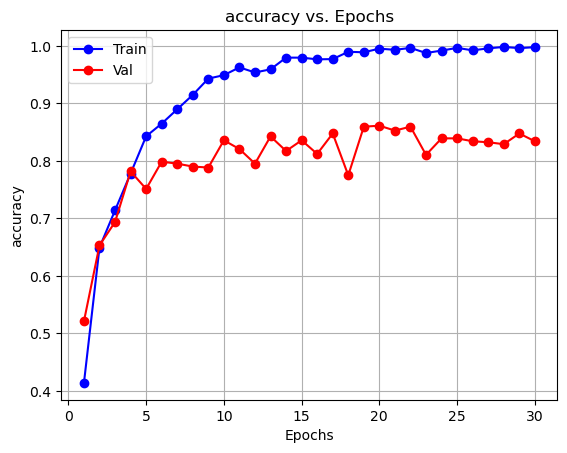

Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\final_cnn_loss.png


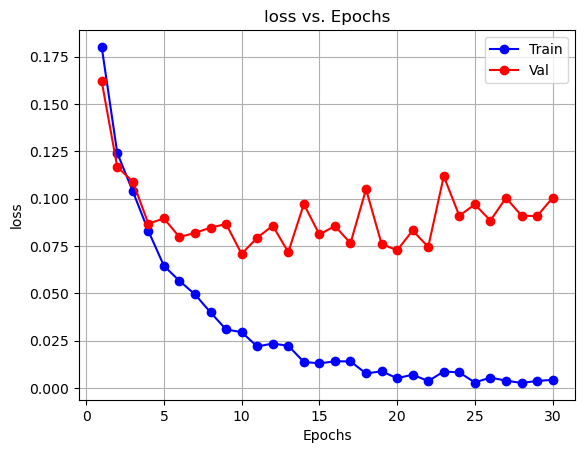

Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\final_cnn_precision.png


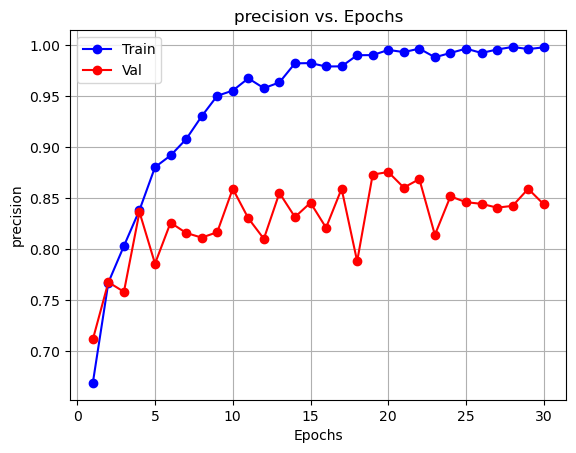

Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\final_cnn_recall.png


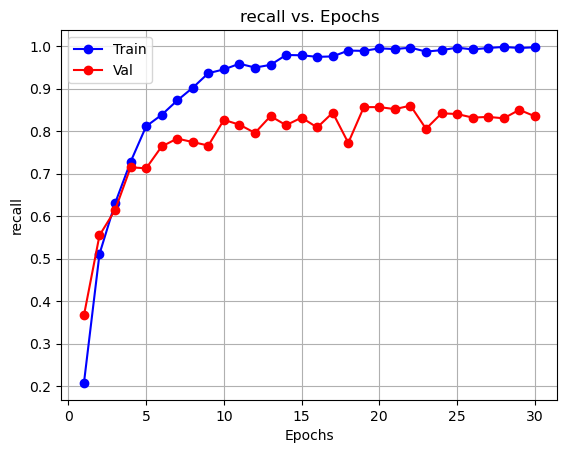

Figure saved as c:\Users\haile\OneDrive - University of Bristol\assessment3\DST-assessment-3.1\DST-assessment-3\Zhihui zhang\final_cnn_f1 score.png


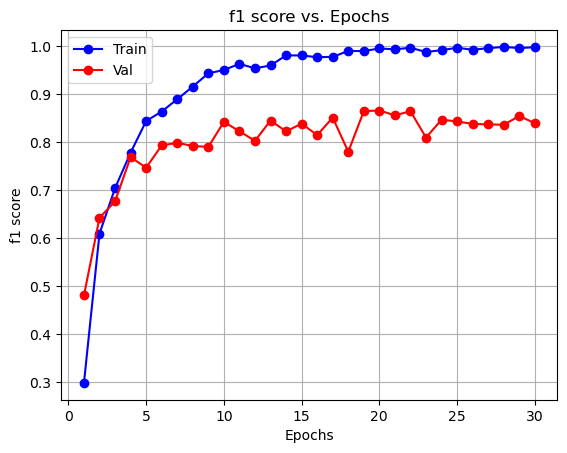

In [11]:
display_training_curves(
    history_3.history['accuracy'], 
    history_3.history['val_accuracy'], 
    'accuracy')
display_training_curves(
    history_3.history['loss'], 
    history_3.history['val_loss'], 
    'loss')
display_training_curves(
    history_3.history['precision_m'], 
    history_3.history['val_precision_m'], 
    'precision')
display_training_curves(
    history_3.history['recall_m'], 
    history_3.history['val_recall_m'], 
    'recall')
display_training_curves(
    history_3.history['f1_m'], 
    history_3.history['val_f1_m'], 
    'f1 score')